<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%204%20-%20Machine%20Leaning/code/ML_01_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Not used, just informative
#X, y = datasets.make_classification(n_samples=600, n_features=30, n_informative=3, n_classes=3)
#np.savez("kNN_data.npz", X=X, y=y)

In [3]:
# Load data from disc
loaded_data = np.load("kNN_data.npz")
print(loaded_data.files)

['X', 'y']


In [4]:
# Extract input and output data
X = loaded_data['X']
y = loaded_data['y']

print(X.shape)
print(y.shape)

(600, 30)
(600,)


Unique labels: [0 1 2]


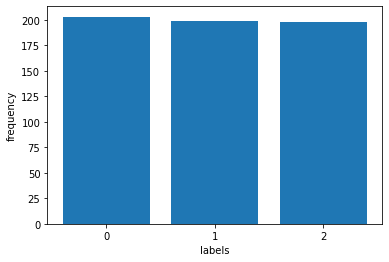

In [5]:
# Look the distribution of labels
print("Unique labels:", np.unique(y))

plt.hist(y, bins=[0, 1, 2, 3], align='left', rwidth=0.8)
plt.xticks([0, 1, 2], labels=['0', '1', '2'])
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

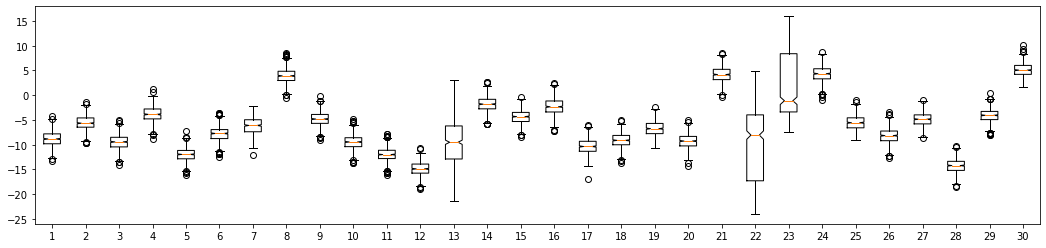

In [6]:
# Look at the distribution of the independent variables
plt.figure(figsize=(18, 4))
plt.boxplot(X, notch=True)
plt.show()

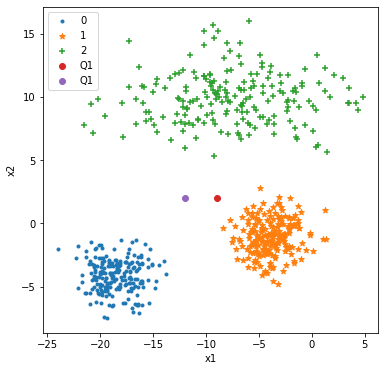

In [7]:
# Plot all points using only two of their features.
# Also plot two random queries
# You might try a differnt set of features
x1 = 21
x2 = 22

plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, x1], X[y==0, x2], marker='.', label='0')
plt.scatter(X[y==1, x1], X[y==1, x2], marker='*', label='1')
plt.scatter(X[y==2, x1], X[y==2, x2], marker='+', label='2')
plt.scatter(-9, 2, label='Q1')
plt.scatter(-12, 2, label='Q1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
# Split data into training, validation, and test sets
# Use only 10 features
x_train, x_test, y_train, y_test = train_test_split(X[:, :10], y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(486, 10)
(54, 10)
(60, 10)
(486,)
(54,)
(60,)


# Part 2: kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# Create a kNN classifier and train it on the training set.
# Use 3 nearest neighbors for now
kNN_classifier = KNeighborsClassifier(n_neighbors=3) # create model
kNN_classifier.fit(x_train, y_train)                 # train model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
# Print the labels that are know by the trained classifier
print(kNN_classifier.classes_)

[0 1 2]


In [15]:
# Evaluate on the training set first
print(f"Classification score on the training set: {kNN_classifier.score(x_train, y_train):.4f} \n")

Classification score on the training set: 0.6852 



In [13]:
# Predict on the validation set first
y_val_hat = kNN_classifier.predict(x_val)

print(f"Classification score on the validation set: {kNN_classifier.score(x_val, y_val):.4f} \n")
print(y_val)
print(y_val_hat)

Classification score on the validation set: 0.4074 

[1 2 2 1 1 2 0 2 2 2 0 1 0 2 1 1 1 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 1 0 1 1
 2 0 0 2 0 1 0 0 0 1 1 1 0 1 2 2 1]
[0 0 2 1 1 0 1 0 0 2 2 2 0 0 1 0 0 0 2 0 2 0 0 1 0 1 1 2 2 1 1 1 0 0 2 0 1
 2 0 0 0 0 1 0 1 0 0 1 0 0 0 2 0 1]


In [14]:
# Predict on the test set now
y_test_hat = kNN_classifier.predict(x_test)

print(f"Classification score on the test set: {kNN_classifier.score(x_test, y_test):.4f} \n")
print(y_test)
print(y_test_hat)

Classification score on the test set: 0.4167 

[1 0 0 2 1 2 0 0 0 2 1 0 2 2 1 2 2 1 1 2 1 2 2 1 0 2 1 2 1 0 2 0 1 1 1 2 0
 0 1 0 1 0 0 0 1 1 1 2 2 2 0 0 1 2 2 2 0 0 1 0]
[1 1 1 2 0 2 1 0 0 2 1 0 2 0 0 0 0 0 2 0 2 0 1 1 0 0 0 1 0 2 0 0 1 2 2 0 0
 0 1 2 0 2 2 2 1 0 0 1 0 2 1 0 0 0 2 2 0 0 1 0]


# Part 3: Experiment with different values of k

In [18]:
for k in [1, 3, 5, 11, 21, 31, 51, 101]:
  print(f"k = {k:3d}")
  # Create model and train it
  kNN_classifier = KNeighborsClassifier(n_neighbors=k)
  kNN_classifier.fit(x_train, y_train)
  # Evaluate and print info
  print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.4f}")
  print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.4f}")

k =   1
  performance on the training set: 1.0000
  performance score on the validation set: 0.3333
k =   3
  performance on the training set: 0.6852
  performance score on the validation set: 0.4074
k =   5
  performance on the training set: 0.6049
  performance score on the validation set: 0.3704
k =  11
  performance on the training set: 0.5597
  performance score on the validation set: 0.3889
k =  21
  performance on the training set: 0.5370
  performance score on the validation set: 0.3889
k =  31
  performance on the training set: 0.5453
  performance score on the validation set: 0.5370
k =  51
  performance on the training set: 0.5082
  performance score on the validation set: 0.4444
k = 101
  performance on the training set: 0.4918
  performance score on the validation set: 0.6111


In [28]:
max_k = 400

perf_train = np.zeros(max_k)
perf_val = np.zeros(max_k)

for k in range(1, max_k):
  # Create model and train it
  kNN_classifier = KNeighborsClassifier(n_neighbors=k)
  kNN_classifier.fit(x_train, y_train)
  # Evaluate and print info
  perf_train[k] = kNN_classifier.score(x_train, y_train)
  perf_val[k] = kNN_classifier.score(x_val, y_val)

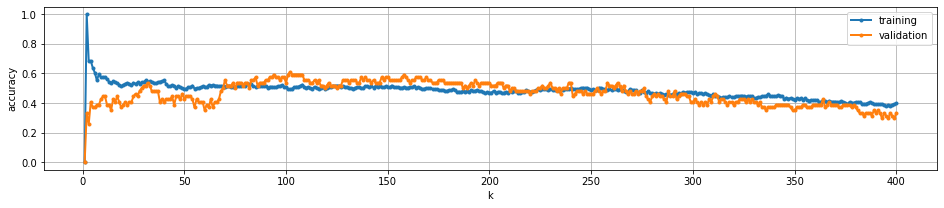

In [32]:
# Plot loss
plt.figure(figsize=(16, 3))
plt.plot(range(1, max_k+1), perf_train, label='training', marker='.', linewidth=2)
plt.plot(range(1, max_k+1), perf_val,   label='validation', marker='.', linewidth=2)
plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy')
#plt.ylim((-4, 1))
plt.grid(True)
plt.show()

# using grid search

In [36]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Define search parameters
grid_params = {'n_neighbors': np.arange(1, 103, 2), 'metric': ['euclidean', 'manhattan']}

In [37]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params)

In [38]:
gs_results = gs.fit(x_train, y_train)

In [47]:
print(f"Best score: {gs_results.best_score_:.4f}")
print(f"Best params: {gs_results.best_params_}")

Best score: 0.4896
Best params: {'metric': 'manhattan', 'n_neighbors': 99}


# Part 4: Experiment with more features

In [51]:
# Define the number of features
n_features = [5, 10, 15, 20, 25, 30]

In [53]:
for nf in n_features:
  # Split data (the wrong way)
  x_train, x_test, y_train, y_test = train_test_split(X[:, :nf], y, test_size=0.1, random_state=42)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

  # Create model and train it
  kNN_classifier = KNeighborsClassifier(n_neighbors=3)
  kNN_classifier.fit(x_train, y_train)
  
  # Evaluate and print info
  print(f"Number of features: {nf}")
  print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.4f}")
  print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.4f}")

Number of features: 5
  performance on the training set: 0.5844
  performance score on the validation set: 0.2407
Number of features: 10
  performance on the training set: 0.6852
  performance score on the validation set: 0.4074
Number of features: 15
  performance on the training set: 0.7490
  performance score on the validation set: 0.5370
Number of features: 20
  performance on the training set: 0.7469
  performance score on the validation set: 0.5556
Number of features: 25
  performance on the training set: 0.9979
  performance score on the validation set: 1.0000
Number of features: 30
  performance on the training set: 1.0000
  performance score on the validation set: 1.0000


In [54]:
# Repeat training with the best model
nf = 25
x_train, x_test, y_train, y_test = train_test_split(X[:, :nf], y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Train model
kNN_classifier = KNeighborsClassifier(n_neighbors=3)
kNN_classifier.fit(x_train, y_train)
  
# Evaluate and print info
print(f"Number of features: {nf}")
print(f"  performance on the training set: {kNN_classifier.score(x_train, y_train):.4f}")
print(f"  performance score on the validation set: {kNN_classifier.score(x_val, y_val):.4f}")
print(f"  performance score on the test set: {kNN_classifier.score(x_test, y_test):.4f}")

Number of features: 25
  performance on the training set: 0.9979
  performance score on the validation set: 1.0000
  performance score on the test set: 1.0000
